## AnalyZor Example 
This jupyter notebook loads data from a stimulate/record experiment and shows some basic functions. An engineered neural network was stimulated with a 4 Hz, 800 mV stimulus for 30 s. The data was recorded using the MaxOne System and the legacy file format and containes only spike information (no raw data).

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

# load the AnalyZor Module
from AnalyZor_Class import AnalyZor

# Creating an AnalyZor Object and provide information on the stimulation electrode
file = "Example_Data/DIV_20_10782_09827_800.raw.h5"
data = AnalyZor(file, auto_parse= False, stimulation_electrodes= [9827])

# Load the data and blank (here: spikes only, we can also load the raw data if available)
data.loadDataSpikesOnly(blankingBool=True)

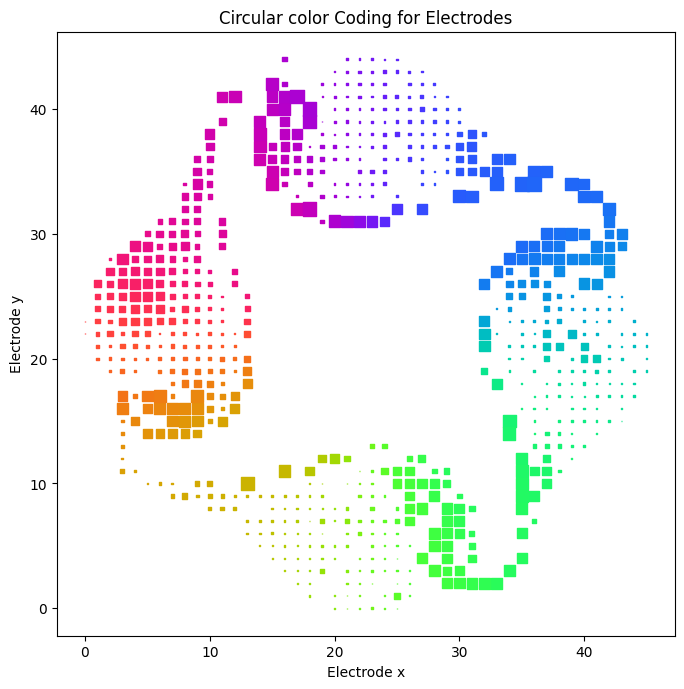

In [16]:
# show the electrode color coding and modulate dotsize according to activity
el_color_sort, color_val, dotsize = data.circular_color_coding(showPlotBool = True, modulate_dotsize=True, dotbase = 100)

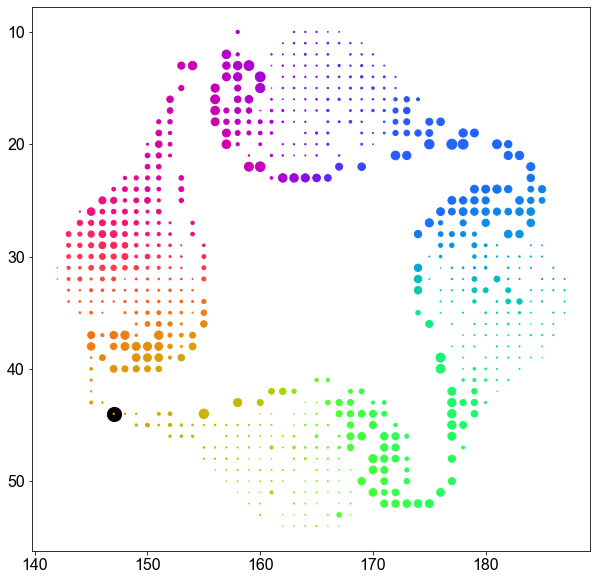

In [12]:
# Create the same color-coded plot but this time using the data returned by the function
# Also plot the stimulation electrode in this figure
stim_el = 9827

# Convert the electrode number to row/column coordinates
coords = np.asarray([data.convert_elno_to_xy(i) for i in el_color_sort])

plt.figure(figsize = (10,10))
plt.gca().invert_yaxis()
plt.scatter(data.convert_elno_to_xy(stim_el)[1],  data.convert_elno_to_xy(stim_el)[0], color = "k", s = 200)
plt.scatter(coords[:,1], coords[:,0], color = color_val, s = dotsize)
plt.show()

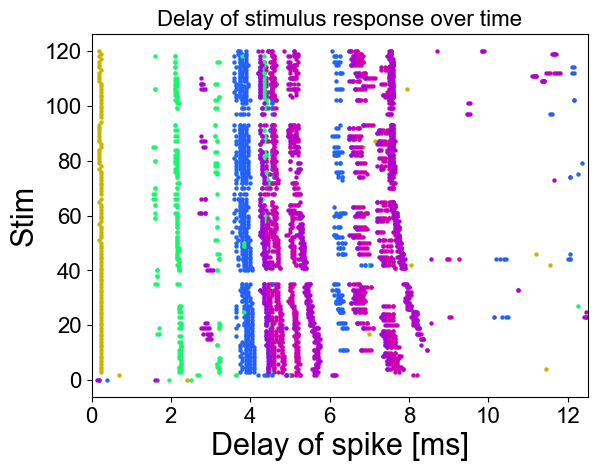

In [13]:
# Find the most active electrodes
electrodes_to_plot,_ = data.select_most_active_el("most_active", value = 20)

# Generate the stimulation response scatter plot of most active electrodes
delayMatrix, plot_colors,_ = data.stimulationResponseDelayOverTime(electrodes_to_plot, numberOfStimsToSkip = 0, window=250, showPlotBool=True, dotSize=10,plotAllResponsesBool = True, autocolor = True, plotLegendBool = False)

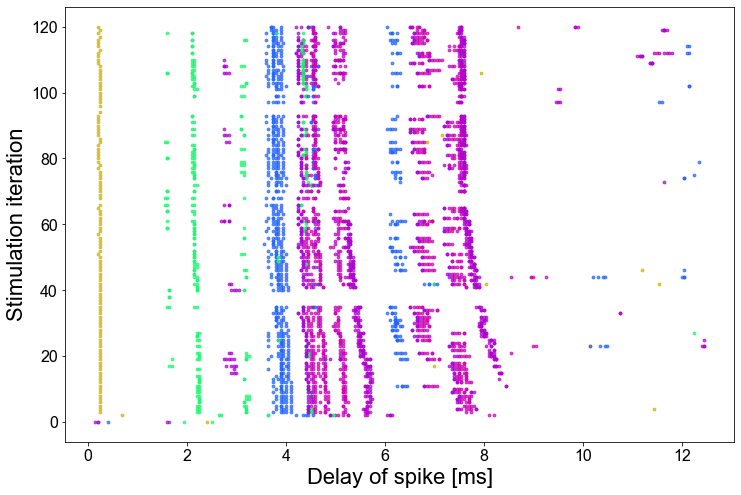

In [14]:
# Generate the same plot as before but with the returned values of the function
plt.figure(figsize=(12,8))
for q in range(len(delayMatrix)):
    plt.scatter(delayMatrix[q][0], delayMatrix[q][1], color = plot_colors[q], s = 8, alpha = 0.7)
plt.xlabel("Delay of spike [ms]")
plt.ylabel("Stimulation iteration")
plt.show()

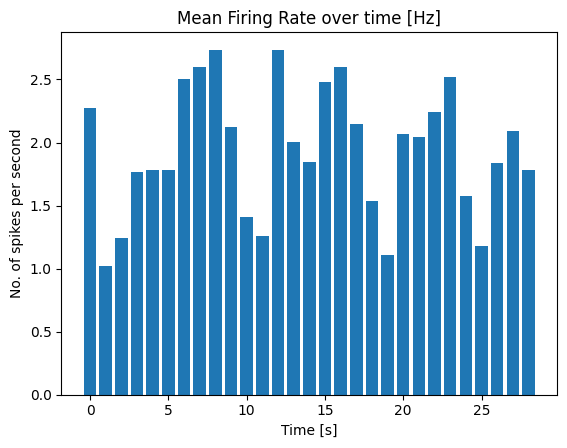

In [6]:
# Generate a histogram displaying the mean firing rate over time
MFR = data.meanFiringRate(showPlotBool = True, binSize = "s")

In [11]:
# Generate a movie that shows the propagation of activity
data.signalPropagationMovie(162688, 200, slowDownFactor = 1000)